# Tarea para el Hogar 04

In [ ]:
# Buscar cuales son los hiperparámetros que tienen mayor relevancia en el modelo LightGBM

##  1. Big Picture

LightGBM es el algoritmo estado del arte para datasets estructurados.
<br> La Bayesian Optimization es el estado del arte para optimización de hiperparámetros
<br> Las soluciones a las tres competencias de la asignatura contendrán LightGBMs y Bayesian Optimizations
<br> LightGBM ha aumentado en forma no darwiniana sus hiperparámetros en los últimos ocho años; no todos los existentes son útiles.
<br> Es necesario lograr entender cuales son los hiperparámetros relevantes de LightGBM

## 2. Hiperparámetros del LightGBM

Los objetivos de esta tarea son:


*   Aumentar la rentabilidad de la campaña de marketing de retención proactiva de clientes.
*   Generar un mejor modelo optimizando sus hiperparámetros
*   Conceptual : investigar los mas relevantes hiperparámetros de LightGBM
*   Familiarizarse con la Bayesian Optimization, sus largos tiempos de corrida y opciones para reducirlos
*   Familiarizarse con el uso de máquinas virtuales de Google Colab
*   Ver un pipeline completo de optimización de hiperparámetros y puesta en producción

LightGBM cuenta con mas de 60 hiperparámetros, siendo posible utilizar 40 al mismo tiempo, aunque no razonable.
<br> La documentación oficial de los hiperparámetros de LightGBM es  https://lightgbm.readthedocs.io/en/latest/Parameters.html#core-parameters


Se lo alerta sobre que una Optimizacion Bayesiana lleva varias horas de corrida, y usted deberá correr VARIAS optimizaciones para descubrir cuales parámetros conviene optimizar.
<br> A pesar que la próxima clase es recien en viernes 01 de agosto, inicie la tarea con tiempo, aprenda a planificar estratégicamente sus corridas como un@ científ@  de datos.

Es necesario investigar cuales son los hiperparámetros de LightGBM que vale la pena optimizar en una Bayesian Optimization, ya que los realmente utiles son apenas un reducido subconjunto.
<br>Usted deberá investigar cuales son los hiperparámetros mas relevantes de LightGBM, su primer alternativa es preguntándole a su amigo con capacidades especiales ChatGPT o sus endogámicos familiares Claude, DeepSeek, Gemini, Grok, etc
<br> La segunda alternativa es la propia documentación de LightGBM  https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html


Adicionalmente podra buscar información como la que proveen esta diminuta muestra aleatoria de artículos ligeros:
*  https://medium.com/@sarahzouinina/a-deep-dive-into-lightgbm-how-to-choose-and-tune-parameters-7c584945842e
*  https://www.kaggle.com/code/somang1418/tuning-hyperparameters-under-10-minutes-lgbm
*  https://towardsdatascience.com/beginners-guide-to-the-must-know-lightgbm-hyperparameters-a0005a812702/


<br>  La muestra anterior se brinda a modo de ejemplo, usted deberá buscar muuuuchas  fuentes adicionales de información
<br> Tenga presente que LightGBM es el estado del arte en modelado predictivo para datasets estructurado, que son el 90% del trabajo del 95% de los Data Scientists en Argentina.

El desafío de esta tarea es:
* Qué hiperparparámetros conviene optimizar?  Las recomendaciones de los artículos ligeros es siempre sensata?  Sus autores realmente hicieron experimentos o son siemplemente escritores de entretenimiento carente de base científica?
* Elegidos los hiperparámetros, cual es el  <desde, hasta> que se debe utilizar en la Bayesian Optimization ?
* Realmente vale la pena optimizar 10 o 16 hiperparámetros al mismo tiempo ?  No resulta contraproducente una búsqueda en un espacio de tal alta dimensionalidad ?

#### 2.1  Seteo del ambiente en Google Colab

Esta parte se debe correr con el runtime en Python3
<br>Ir al menu, Runtime -> Change Runtime Type -> Runtime type ->  **Python 3**

Conectar la virtual machine donde esta corriendo Google Colab con el  Google Drive, para poder tener persistencia de archivos

In [ ]:
# primero establecer el Runtime de Python 3
# from google.colab import drive
# drive.mount('/content/.drive')

Mounted at /content/.drive


Para correr la siguiente celda es fundamental en Arranque en Frio haber copiado el archivo kaggle.json al Google Drive, en la carpeta indicada en el instructivo

<br>los siguientes comando estan en shell script de Linux
*   Crear las carpetas en el Google Drive
*   "instalar" el archivo kaggle.json desde el Google Drive a la virtual machine para que pueda ser utilizado por la libreria  kaggle de Python
*   Bajar el  **dataset_pequeno**  al  Google Drive  y tambien al disco local de la virtual machine que esta corriendo Google Colab



In [ ]:
# %%shell

# mkdir -p "/content/.drive/My Drive/dmeyf"
# mkdir -p "/content/buckets"
# ln -s "/content/.drive/My Drive/dmeyf" /content/buckets/b1


# mkdir -p /content/buckets/b1/exp
# mkdir -p /content/buckets/b1/datasets
# mkdir -p /content/datasets



# archivo_origen="https://storage.googleapis.com/open-courses/dmeyf2025-e4a2/competencia_01_crudo.csv"
# archivo_destino="/content/datasets/competencia_01_crudo.csv"
# archivo_destino_bucket="/content/buckets/b1/datasets/competencia_01_crudo.csv"

# if ! test -f $archivo_destino_bucket; then
#   wget  $archivo_origen  -O $archivo_destino_bucket
# fi


# if ! test -f $archivo_destino; then
#   cp  $archivo_destino_bucket  $archivo_destino
# fi


## Generacion de la clase_ternaria

Esta parte se debe correr con el runtime en lenguaje **R** Ir al menu, Runtime -> Change Runtime Tipe -> Runtime type -> R

In [ ]:
require( "data.table" )

# leo el dataset
dataset <- fread("/content/datasets/competencia_01_crudo.csv" )

# calculo el periodo0 consecutivo
dsimple <- dataset[, list(
    "pos" = .I,
    numero_de_cliente,
    periodo0 = as.integer(foto_mes/100)*12 +  foto_mes%%100 ) ]


# ordeno
setorder( dsimple, numero_de_cliente, periodo0 )

# calculo topes
periodo_ultimo <- dsimple[, max(periodo0) ]
periodo_anteultimo <- periodo_ultimo - 1


# calculo los leads de orden 1 y 2
dsimple[, c("periodo1", "periodo2") :=
    shift(periodo0, n=1:2, fill=NA, type="lead"),  numero_de_cliente ]

# assign most common class values = "CONTINUA"
dsimple[ periodo0 < periodo_anteultimo, clase_ternaria := "CONTINUA" ]

# calculo BAJA+1
dsimple[ periodo0 < periodo_ultimo &
    ( is.na(periodo1) | periodo0 + 1 < periodo1 ),
    clase_ternaria := "BAJA+1" ]

# calculo BAJA+2
dsimple[ periodo0 < periodo_anteultimo & (periodo0+1 == periodo1 )
    & ( is.na(periodo2) | periodo0 + 2 < periodo2 ),
    clase_ternaria := "BAJA+2" ]


# pego el resultado en el dataset original y grabo
setorder( dsimple, pos )
dataset[, clase_ternaria := dsimple$clase_ternaria ]

fwrite( dataset,
    file =  "/content/datasets/competencia_01.csv.gz",
    sep = ","
)

Loading required package: data.table



In [ ]:
setorder( dataset, foto_mes, clase_ternaria, numero_de_cliente)
dataset[, .N, list(foto_mes, clase_ternaria)]

foto_mes,clase_ternaria,N
<int>,<chr>,<int>
202101,BAJA+1,622
202101,BAJA+2,825
202101,CONTINUA,160080
202102,BAJA+1,831
202102,BAJA+2,1032
202102,CONTINUA,160292
202103,BAJA+1,1039
202103,BAJA+2,951
202103,CONTINUA,161119


### 2.2 Optimizacion Hiperparámetros

Esta parte se debe correr con el runtime en lenguaje R Ir al menu, Runtime -> Change Runtime Type -> Runtime type -> R

### 2.2.1 Inicio

limpio el ambiente de R

In [ ]:
format(Sys.time(), "%a %b %d %X %Y")

[1] "Fri Oct 10 13:04:38 2025"

In [ ]:
# limpio la memoria
rm(list=ls(all.names=TRUE)) # remove all objects
gc(full=TRUE, verbose=FALSE) # garbage collection

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,725960,38.8,1454648,77.7,1454648,77.7
Vcells,1423187,10.9,169514367,1293.3,211568385,1614.2


### 2.2.2 Carga de Librerias

Esta parte lleva varios minutos la primera vez en Google Colab

In [ ]:
# cargo las librerias que necesito
require("data.table")
require("parallel")

if(!require("R.utils")) install.packages("R.utils")
require("R.utils")

if( !require("primes") ) install.packages("primes")
require("primes")

if( !require("utils") ) install.packages("utils")
require("utils")

if( !require("rlist") ) install.packages("rlist")
require("rlist")

if( !require("yaml")) install.packages("yaml")
require("yaml")

if( !require("lightgbm") ) install.packages("lightgbm")
require("lightgbm")

if( !require("DiceKriging") ) install.packages("DiceKriging")
require("DiceKriging")

if( !require("mlrMBO") ) install.packages("mlrMBO")
require("mlrMBO")

Loading required package: parallel

Loading required package: R.utils

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.27.1 (2025-05-02 21:00:05 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.13.0 (2025-02-24 21:20:02 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, use, warnings


Loading required package: primes

Loading required package: rlist

Loading required packa

### 2.2.3 Definicion de Parametros

aqui debe cargar SU semilla primigenia
<br>recuerde cambiar el numero de experimento en cada corrida nueva

In [ ]:
PARAM <- list()
PARAM$experimento <- 0008
PARAM$semilla_primigenia <- 143287

In [ ]:
# training y future
PARAM$train <- c(202101,202102,202103)
PARAM$train_final <- c(202101,202102,202103)
PARAM$future <- c(202104)
PARAM$semilla_kaggle <- 314159
PARAM$cortes <- seq(6000, 19000, by= 500)

In [ ]:
# un undersampling de 0.1  toma solo el 10% de los CONTINUA
# undersampling de 1.0  implica tomar TODOS los datos

PARAM$trainingstrategy$undersampling <- 0.1

In [ ]:
# Parametros LightGBM

PARAM$hyperparametertuning$xval_folds <- 5

# parametros fijos del LightGBM que se pisaran con la parte variable de la BO
PARAM$lgbm$param_fijos <-  list(
  boosting= "dart", # puede ir  dart  , ni pruebe random_forest
  objective= "binary",
  metric= "auc",
  first_metric_only= FALSE,
  boost_from_average= TRUE,
  feature_pre_filter= FALSE,
  force_row_wise= TRUE, # para reducir warnings
  verbosity= -100,

  seed= PARAM$semilla_primigenia,

  max_depth= -1L, # -1 significa no limitar,  por ahora lo dejo fijo
  min_gain_to_split= 0, # min_gain_to_split >= 0
  min_sum_hessian_in_leaf= 0.001, #  min_sum_hessian_in_leaf >= 0.0
  lambda_l1= 0.0, # lambda_l1 >= 0.0
  lambda_l2= 0.0, # lambda_l2 >= 0.0
  max_bin= 31L, # lo debo dejar fijo, no participa de la BO

  bagging_fraction= 1.0, # 0.0 < bagging_fraction <= 1.0
  pos_bagging_fraction= 1.0, # 0.0 < pos_bagging_fraction <= 1.0
  neg_bagging_fraction= 1.0, # 0.0 < neg_bagging_fraction <= 1.0
  is_unbalance= FALSE, #
  scale_pos_weight= 1.0, # scale_pos_weight > 0.0

  drop_rate= 0.1, # 0.0 < neg_bagging_fraction <= 1.0
  max_drop= 50, # <=0 means no limit
  skip_drop= 0.5, # 0.0 <= skip_drop <= 1.0

  extra_trees= FALSE,

  num_iterations= 3307,
  learning_rate= 0.002487688,
  feature_fraction= 0.574054,
  num_leaves= 47,
  min_data_in_leaf= 1697
)


Aqui se definen los hiperparámetros de LightGBM que participan de la Bayesian Optimization
<br> si es un numero entero debe ir  makeIntegerParam
<br> si es un numero real (con decimales) debe ir  makeNumericParam
<br> es muy importante leer cuales son un lower y upper  permitidos y ademas razonables

# Experimento 1(4940):
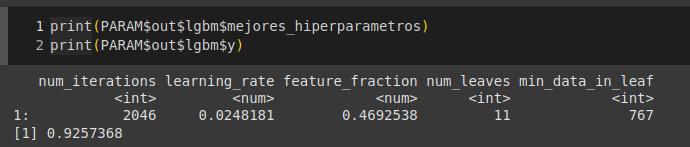


image.png

# Experimento 2(4941):
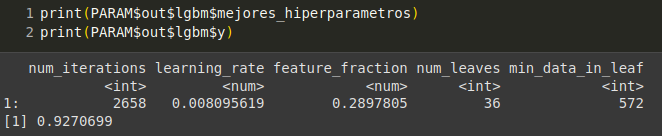

image.png

# Experimento 3(4942):

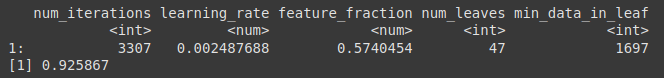

image.png


# Experiento 4(4943):

#-

In [ ]:
# Aqui se cargan los bordes de los hiperparametros de la BO
PARAM$hypeparametertuning$hs <- makeParamSet(
  makeIntegerParam("num_iterations", lower= 2048L, upper= 4096L), #L indica que son enteros
  makeNumericParam("learning_rate", lower= 0.002, upper= 0.2),
  makeNumericParam("feature_fraction", lower= 0.2, upper= 0.8),
  makeIntegerParam("num_leaves", lower= 2L, upper= 64L),
  makeIntegerParam("min_data_in_leaf", lower= 1L, upper= 2048L)
)

A mayor cantidad de hiperparámetros, se debe aumentar las iteraciones de la Bayesian Optimization
<br> 30 es un valor muy tacaño, pero corre rápido
<br> deberia partir de 50, alcanzando los 100 si se dispone de tiempo

In [ ]:
PARAM$hyperparametertuning$iteraciones <- 12 # iteraciones bayesianas

In [ ]:
# particionar agrega una columna llamada fold a un dataset
#   que consiste en una particion estratificada segun agrupa
# particionar( data=dataset, division=c(70,30),
#  agrupa=clase_ternaria, seed=semilla)   crea una particion 70, 30

particionar <- function(data, division, agrupa= "", campo= "fold", start= 1, seed= NA) {
  if (!is.na(seed)) set.seed(seed, "L'Ecuyer-CMRG")

  bloque <- unlist(mapply(
    function(x, y) {rep(y, x)},division, seq(from= start, length.out= length(division))))

  data[, (campo) := sample(rep(bloque,ceiling(.N / length(bloque))))[1:.N],by= agrupa]
}

In [ ]:
# iniciliazo el dataset de realidad, para medir ganancia
realidad_inicializar <- function( pfuture, pparam) {

  # datos para verificar la ganancia
  drealidad <- pfuture[, list(numero_de_cliente, foto_mes, clase_ternaria)]

  particionar(drealidad,
    division= c(3, 7),
    agrupa= "clase_ternaria",
    seed= PARAM$semilla_kaggle
  )

  return( drealidad )
}

In [ ]:
# evaluo ganancia en los datos de la realidad

realidad_evaluar <- function( prealidad, pprediccion) {

  prealidad[ pprediccion,
    on= c("numero_de_cliente", "foto_mes"),
    predicted:= i.Predicted
  ]

  tbl <- prealidad[, list("qty"=.N), list(fold, predicted, clase_ternaria)]

  res <- list()
  res$public  <- tbl[fold==1 & predicted==1L, sum(qty*ifelse(clase_ternaria=="BAJA+2", 780000, -20000))]/0.3
  res$private <- tbl[fold==2 & predicted==1L, sum(qty*ifelse(clase_ternaria=="BAJA+2", 780000, -20000))]/0.7
  res$total <- tbl[predicted==1L, sum(qty*ifelse(clase_ternaria=="BAJA+2", 780000, -20000))]

  prealidad[, predicted:=NULL]
  return( res )
}

### 2.2.4  Preprocesamiento

In [ ]:
# carpeta de trabajo

setwd("/content/buckets/b1/exp")
experimento_folder <- paste0("HT", PARAM$experimento)
dir.create(experimento_folder, showWarnings=FALSE)
setwd( paste0("/content/buckets/b1/exp/", experimento_folder ))

In [ ]:
# lectura del dataset
dataset <- fread("/content/datasets/competencia_01.csv.gz", stringsAsFactors= TRUE)

## FEATURE ENGENIERING

In [ ]:
# CELDA DE MODIFICACION DE FEATURES
# El objetivo es generar nuevas features. Con la función shift le vamos a poder generar nuevas columnas con los valores pasados o futuros de un dado registro.

# Ordenar primero
setorder(dataset, numero_de_cliente, foto_mes)

# Columnas a excluir (las de agrupamiento/identificación)
excluir <- c("numero_de_cliente", "foto_mes", "clase_ternaria")

# Obtener nombres de columnas para aplicar lags
columnas_lag <- setdiff(names(dataset), excluir)

# Acá decimos desde que mes hacia el futoro o pasado queremos poder ver

# Aplicar lags 1, 2 y 3
lags <- 2

for(lag in lags) {
  dataset[, paste0(columnas_lag, "_lag", lag) :=
           lapply(.SD, shift, n = lag),
         by = numero_de_cliente,
         .SDcols = columnas_lag]
  # Generar las columnas delta (valor actual - valor lag)
  dataset[, paste0(columnas_lag, "_delta", lag) :=
           Map(function(x, y) x - y,
               .SD, dataset[, paste0(columnas_lag, "_lag", lag), with = FALSE]),
         .SDcols = columnas_lag]
}

# Definir la función de concavidad local
concavidad_local <- function(x) {
  if (length(x) < 3 || anyNA(x)) return(NA_real_)
  x[length(x)] - 2*x[length(x)-1] + x[length(x)-2]
}

# Versión optimizada
crear_concavidad_opt <- function(dt, vars, n) {
  dt[, paste0(vars, "_concavidad_", n) :=
        lapply(.SD, function(col)
          frollapply(col, n = n, FUN = concavidad_local, align = "right")),
     by = numero_de_cliente,
     .SDcols = vars]
}

# Ejemplo de uso:
crear_concavidad_opt(dataset, columnas_lag, n = 3)


# Intentamos identificar quien recibe aguinaldo
# Creo un criterio de identificación de aguinaldo, y la modifico con un factor de proporcion
vars_ingresos <- columnas_lag

for (var in vars_ingresos) {
  mediana_hist <- median(dataset[foto_mes < 202106, get(var)], na.rm = TRUE)
  mediana_junio <- median(dataset[foto_mes == 202106, get(var)], na.rm = TRUE)

  factor <- mediana_hist / mediana_junio

  dataset[foto_mes == 202106, (var) := get(var) * factor]
}


Warning message in `[.data.table`(dataset, foto_mes == 202106, `:=`((var), get(var) * :
“96.468750 (type 'double') at RHS position 1 out-of-range(NA) or truncated (precision lost) when assigning to type 'integer' (column 7 named 'cliente_antiguedad')”
Warning message in `[.data.table`(dataset, foto_mes == 202106, `:=`((var), get(var) * :
“4.545455 (type 'double') at RHS position 1 out-of-range(NA) or truncated (precision lost) when assigning to type 'integer' (column 98 named 'chomebanking_transacciones')”
Warning message in `[.data.table`(dataset, foto_mes == 202106, `:=`((var), get(var) * :
“-321.561884 (type 'double') at RHS position 1 out-of-range(NA) or truncated (precision lost) when assigning to type 'integer' (column 114 named 'Master_Fvencimiento')”
Warning message in `[.data.table`(dataset, foto_mes == 202106, `:=`((var), get(var) * :
“44.347826 (type 'double') at RHS position 1741 out-of-range(NA) or truncated (precision lost) when assigning to type 'integer' (column 115 nam

In [ ]:
dataset_train <- dataset[foto_mes %in% PARAM$train]

In [ ]:
# paso la clase a binaria que tome valores {0,1}  enteros
#  BAJA+1 y BAJA+2  son  1,   CONTINUA es 0
#  a partir de ahora ya NO puedo cortar  por prob(BAJA+2) > 1/40

dataset_train[,
  clase01 := ifelse(clase_ternaria %in% c("BAJA+2","BAJA+1"), 1L, 0L)
]

In [ ]:
# defino los datos que forma parte del training
# aqui se hace el undersampling de los CONTINUA
# notar que para esto utilizo la SEGUNDA semilla

set.seed(PARAM$semilla_primigenia, kind = "L'Ecuyer-CMRG")
dataset_train[, azar := runif(nrow(dataset_train))]
dataset_train[, training := 0L]

dataset_train[
  foto_mes %in%  PARAM$train &
    (azar <= PARAM$trainingstrategy$undersampling | clase_ternaria %in% c("BAJA+1", "BAJA+2")),
  training := 1L
]

In [ ]:
# los campos que se van a utilizar

campos_buenos <- setdiff(
  colnames(dataset_train),
  c("clase_ternaria", "clase01", "azar", "training")
)

In [ ]:
# dejo los datos en el formato que necesita LightGBM

dtrain <- lgb.Dataset(
  data= data.matrix(dataset_train[training == 1L, campos_buenos, with= FALSE]),
  label= dataset_train[training == 1L, clase01],
  free_raw_data= FALSE
)

nrow(dtrain)
ncol(dtrain)

[1] 53377

[1] 458

2.2.5 Configuracion Bayesian Optimization

In [ ]:
# En el argumento x llegan los parmaetros de la bayesiana
#  devuelve la AUC en cross validation del modelo entrenado

EstimarGanancia_AUC_lightgbm <- function(x) {

  # x pisa (o agrega) a param_fijos
  param_completo <- modifyList(PARAM$lgbm$param_fijos, x)

  # entreno LightGBM
  modelocv <- lgb.cv(
    data= dtrain,
    nfold= PARAM$hyperparametertuning$xval_folds,
    stratified= TRUE,
    param= param_completo
  )

  # obtengo la ganancia
  AUC <- modelocv$best_score

  # hago espacio en la memoria
  rm(modelocv)
  gc(full= TRUE, verbose= FALSE)

  message(format(Sys.time(), "%a %b %d %X %Y"), " AUC ", AUC)

  return(AUC)
}

In [ ]:
# Aqui comienza la configuracion de la Bayesian Optimization

# en este archivo quedan la evolucion binaria de la BO
kbayesiana <- "bayesiana.RDATA"

funcion_optimizar <- EstimarGanancia_AUC_lightgbm # la funcion que voy a maximizar

configureMlr(show.learner.output= FALSE)

# configuro la busqueda bayesiana,  los hiperparametros que se van a optimizar
# por favor, no desesperarse por lo complejo

obj.fun <- makeSingleObjectiveFunction(
  fn= funcion_optimizar, # la funcion que voy a maximizar
  minimize= FALSE, # estoy Maximizando la ganancia
  noisy= TRUE,
  par.set= PARAM$hypeparametertuning$hs, # definido al comienzo del programa
  has.simple.signature= FALSE # paso los parametros en una lista
)

# cada 600 segundos guardo el resultado intermedio
ctrl <- makeMBOControl(
  save.on.disk.at.time= 600, # se graba cada 600 segundos
  save.file.path= kbayesiana
) # se graba cada 600 segundos

# indico la cantidad de iteraciones que va a tener la Bayesian Optimization
ctrl <- setMBOControlTermination(
  ctrl,
  iters= PARAM$hyperparametertuning$iteraciones
) # cantidad de iteraciones

# defino el método estandar para la creacion de los puntos iniciales,
# los "No Inteligentes"
ctrl <- setMBOControlInfill(ctrl, crit= makeMBOInfillCritEI())

# establezco la funcion que busca el maximo
surr.km <- makeLearner(
  "regr.km",
  predict.type= "se",
  covtype= "matern3_2",
  control= list(trace= TRUE)
)


2.2.6 Corrida Bayesian Optimization

In [ ]:
# inicio la optimizacion bayesiana, retomando si ya existe
# es la celda mas lenta de todo el notebook

if (!file.exists(kbayesiana)) {
  bayesiana_salida <- mbo(obj.fun, learner= surr.km, control= ctrl)
} else {
  bayesiana_salida <- mboContinue(kbayesiana) # retomo en caso que ya exista
}

Warning message in mboContinue(kbayesiana):
“Tuning ended with term.iter. No need to continue. Simply returning stored result.”


In [ ]:

tb_bayesiana <- as.data.table(bayesiana_salida$opt.path)
colnames( tb_bayesiana)

[1] "num_iterations"   "learning_rate"    "feature_fraction" "num_leaves"      
 [5] "min_data_in_leaf" "y"                "dob"              "eol"             
 [9] "error.message"    "exec.time"        "ei"               "error.model"     
[13] "train.time"       "prop.type"        "propose.time"     "se"              
[17] "mean"

In [ ]:
# # almaceno los resultados de la Bayesian Optimization
# # y capturo los mejores hiperparametros encontrados

tb_bayesiana <- as.data.table(bayesiana_salida$opt.path)

tb_bayesiana[, iter := .I]

# ordeno en forma descendente por AUC = y
setorder(tb_bayesiana, -y)

# grabo para eventualmente poder utilizarlos en OTRA corrida
fwrite( tb_bayesiana,
  file= "BO_log.txt",
  sep= "\t"
)

# los mejores hiperparámetros son los que quedaron en el registro 1 de la tabla
PARAM$out$lgbm$mejores_hiperparametros <- tb_bayesiana[
  1, # el primero es el de mejor AUC
  setdiff(colnames(tb_bayesiana),
    c("y","dob","eol","error.message","exec.time","ei","error.model",
      "train.time","prop.type","propose.time","se","mean","iter")),
  with= FALSE
]


PARAM$out$lgbm$y <- tb_bayesiana[1, y]


In [ ]:
write_yaml( PARAM, file="PARAM.yml")

In [ ]:
print(PARAM$out$lgbm$mejores_hiperparametros)
print(PARAM$out$lgbm$y)

   num_iterations learning_rate feature_fraction num_leaves min_data_in_leaf
            <int>         <num>            <num>      <int>            <int>
1:           2950     0.1227181        0.7992754         62               67
[1] 0.9453182


## 2.3  Produccion

### Final Training
Construyo el modelo final, que es uno solo, no hace ningun tipo de particion < training, validation, testing>]

In [ ]:
setwd("/content/buckets/b1/exp")
experimento <- paste0("exp", PARAM$experimento)
dir.create(experimento, showWarnings= FALSE)
setwd( paste0("/content/buckets/b1/exp/", experimento ))

#### Final Training Dataset

Aqui esta la gran decision de en qué meses hago el Final Training
<br> debo utilizar los mejores hiperparámetros que encontré en la  optimización bayesiana

In [ ]:
# clase01
dataset[, clase01 := ifelse(clase_ternaria %in% c("BAJA+1", "BAJA+2"), 1L, 0L)]

In [ ]:
dataset_train <- dataset[foto_mes %in% PARAM$train_final]
dataset_train[,.N,clase_ternaria]

clase_ternaria,N
<fct>,<int>
CONTINUA,481491
BAJA+2,2808
BAJA+1,2492


In [ ]:
# dejo los datos en el formato que necesita LightGBM

dtrain_final <- lgb.Dataset(
  data= data.matrix(dataset_train[, campos_buenos, with= FALSE]),
  label= dataset_train[, clase01]
)

#### Final Training Hyperparameters

In [ ]:
param_final <- modifyList(PARAM$lgbm$param_fijos,
  PARAM$out$lgbm$mejores_hiperparametros)

# param_final <- PARAM$lgbm$param_fijos

#### Training
Genero el modelo final, siempre sobre TODOS los datos de  final_train, sin hacer ningun tipo de undersampling de la clase mayoritaria y mucho menos cross validation.

In [ ]:
# este punto es muy SUTIL  y será revisado en la Clase 05

param_normalizado <- copy(param_final)
param_normalizado$min_data_in_leaf <-  round(param_final$min_data_in_leaf / PARAM$trainingstrategy$undersampling)

In [ ]:
# entreno LightGBM
# Entreno 5 modelos con los pa{rametros utilizados con la bayesiana, variando la seed.

# Guardamos los modelos
modelos <- list()

# Seeds
semillas <- c(143287, 146213, 310111, 670627, 880553)

# Iteramos
for (i in seq_along(semillas)) {
  cat("Entrenando modelo", i, "con seed =", semillas[i], "\n")

  # Reemplazás la seed en cada iteración
  param_iter <- param_normalizado
  param_iter$seed <- semillas[i]

  # Entrenás el modelo
  modelos[[i]] <- lgb.train(
    data = dtrain_final,
    param = param_iter
  )
}

Entrenando modelo 1 con seed = 143287 
Entrenando modelo 2 con seed = 146213 
Entrenando modelo 3 con seed = 310111 
Entrenando modelo 4 con seed = 670627 
Entrenando modelo 5 con seed = 880553 


### Scoring

Aplico el modelo final a los datos del futuro

In [ ]:
# datos sin clase
dfuture <- dataset[foto_mes %in% PARAM$future]

# matriz de entrada
X_future <- data.matrix(dfuture[, campos_buenos, with = FALSE])

# lista para guardar predicciones
predicciones <- list()

for (i in seq_along(modelos)) {
  cat("Generando predicciones del modelo", i, "\n")
  predicciones[[i]] <- predict(modelos[[i]], X_future)
}

# Convertir a data.table con todas las predicciones
tb_prediccion <- data.table(
  numero_de_cliente = dfuture$numero_de_cliente,
  foto_mes = dfuture$foto_mes
)

# agregar columnas con cada predicción
for (i in seq_along(predicciones)) {
  tb_prediccion[, paste0("prob_modelo_", i) := predicciones[[i]]]
}

# Tabla de predicciones
# guardar resultados
fwrite(tb_prediccion, file = "predicciones_multimodelo_test.txt", sep = "\t")

Generando predicciones del modelo 1 
Generando predicciones del modelo 2 
Generando predicciones del modelo 3 
Generando predicciones del modelo 4 
Generando predicciones del modelo 5 


Si hacemos un promedio directo sobre las predicciones

In [ ]:
# Promedio de predicciones
prediccion_promedio <- Reduce("+", predicciones) / length(predicciones)

# tabla final
tb_prediccion <- dfuture[, .(numero_de_cliente, foto_mes)]
tb_prediccion[, prob := prediccion_promedio]

# guardar archivo final
fwrite(tb_prediccion, file = "prediccion_ensemble_test.txt", sep = "\t")

In [ ]:
# inicilizo el dataset  drealidad
drealidad <- realidad_inicializar( dfuture, PARAM)

Kaggle Competition Submit

In [ ]:
PARAM$cortes

[1]  6000  6500  7000  7500  8000  8500  9000  9500 10000 10500 11000 11500
[13] 12000 12500 13000 13500 14000 14500 15000 15500 16000 16500 17000 17500
[25] 18000 18500 19000

In [ ]:
# genero archivos con los  "envios" mejores
# suba TODOS los archivos a Kaggle

# ordeno por probabilidad descendente
setorder(tb_prediccion, -prob)

dir.create("kaggle_test")

for (envios in PARAM$cortes) {

  tb_prediccion[, Predicted := 0L] # seteo inicial a 0
  tb_prediccion[1:envios, Predicted := 1L] # marco los primeros

  archivo_kaggle <- paste0("./kaggle_test/KA", PARAM$experimento, "_", envios, ".csv")

  # grabo el archivo
  fwrite(tb_prediccion[, list(numero_de_cliente, Predicted)],
    file= archivo_kaggle,
    sep= ","
  )

  res <- realidad_evaluar( drealidad, tb_prediccion)

  options(scipen = 999)
  cat( "Envios=", envios, "\t",
    " TOTAL=", res$total,
    "  Public=", res$public,
    " Private=", res$private,
    "\n",
    sep= ""
  )

}

Envios=6000	 TOTAL=332000000  Public=293933333 Private=348314286
Envios=6500	 TOTAL=337200000  Public=297066667 Private=354400000
Envios=7000	 TOTAL=340000000  Public=301866667 Private=356342857
Envios=7500	 TOTAL=345200000  Public=308266667 Private=361028571
Envios=8000	 TOTAL=352000000  Public=304933333 Private=372171429
Envios=8500	 TOTAL=354800000  Public=309266667 Private=374314286
Envios=9000	 TOTAL=357600000  Public=315800000 Private=375514286
Envios=9500	 TOTAL=360400000  Public=321533333 Private=377057143
Envios=10000	 TOTAL=359200000  Public=317400000 Private=377114286
Envios=10500	 TOTAL=360400000  Public=317666667 Private=378714286
Envios=11000	 TOTAL=356800000  Public=312800000 Private=375657143
Envios=11500	 TOTAL=351600000  Public=308266667 Private=370171429
Envios=12000	 TOTAL=348000000  Public=308466667 Private=364942857
Envios=12500	 TOTAL=346800000  Public=305400000 Private=364542857
Envios=13000	 TOTAL=347200000  Public=308533333 Private=363771429
Envios=13500	 TOTA

In [ ]:
write_yaml( PARAM, file="PARAM.yml")

In [ ]:
format(Sys.time(), "%a %b %d %X %Y")

[1] "Fri Oct 10 15:13:29 2025"

Finalmente usted deberá cargar el resultado de su corrida en la Google Sheet Colaborativa,  hoja **TareaHogar04**
<br> Siéntase libre de agregar las columnas que hagan falta a la planilla

# Ahora entrenamos con los 4 primeros meses y predecimos sobre el mes 6. Entreamos 5 modelos distintos, generados con distintas semillas.

In [ ]:
# training y future
PARAM$train <- c(202101,202102,202103,202104)
PARAM$train_final <- c(202101,202102,202103,202104)
PARAM$future <- c(202106)
PARAM$semilla_kaggle <- 314159
PARAM$cortes <- seq(6000, 19000, by= 500)

In [ ]:
# clase01
dataset[, clase01 := ifelse(clase_ternaria %in% c("BAJA+1", "BAJA+2"), 1L, 0L)]

In [ ]:
dataset_train <- dataset[foto_mes %in% PARAM$train_final]
dataset_train[,.N,clase_ternaria]

clase_ternaria,N
<fct>,<int>
CONTINUA,642824
BAJA+2,3938
BAJA+1,3447


In [ ]:
# dejo los datos en el formato que necesita LightGBM

dtrain_final <- lgb.Dataset(
  data= data.matrix(dataset_train[, campos_buenos, with= FALSE]),
  label= dataset_train[, clase01]
)

Entrenamos con los cuatro meses

In [ ]:
# entreno LightGBM
# Entreno 5 modelos con los pa{rametros utilizados con la bayesiana, variando la seed.

# Guardamos los modelos
modelos <- list()

# Seeds
semillas <- c(143287, 146213, 310111, 670627, 880553)

# Iteramos
for (i in seq_along(semillas)) {
  cat("Entrenando modelo", i, "con seed =", semillas[i], "\n")

  # Reemplazás la seed en cada iteración
  param_iter <- param_normalizado
  param_iter$seed <- semillas[i]

  # Entrenás el modelo
  modelos[[i]] <- lgb.train(
    data = dtrain_final,
    param = param_iter
  )
}

Entrenando modelo 1 con seed = 143287 
Entrenando modelo 2 con seed = 146213 
Entrenando modelo 3 con seed = 310111 
Entrenando modelo 4 con seed = 670627 
Entrenando modelo 5 con seed = 880553 


In [ ]:
# datos sin clase
dfuture <- dataset[foto_mes %in% PARAM$future]

# matriz de entrada
X_future <- data.matrix(dfuture[, campos_buenos, with = FALSE])

# lista para guardar predicciones
predicciones <- list()

for (i in seq_along(modelos)) {
  cat("Generando predicciones del modelo", i, "\n")
  predicciones[[i]] <- predict(modelos[[i]], X_future)
}

# Convertir a data.table con todas las predicciones
tb_prediccion <- data.table(
  numero_de_cliente = dfuture$numero_de_cliente,
  foto_mes = dfuture$foto_mes
)

# agregar columnas con cada predicción
for (i in seq_along(predicciones)) {
  tb_prediccion[, paste0("prob_modelo_", i) := predicciones[[i]]]
}

# Tabla de predicciones
# guardar resultados
fwrite(tb_prediccion, file = "predicciones_multimodelo_final.txt", sep = "\t")

Generando predicciones del modelo 1 
Generando predicciones del modelo 2 
Generando predicciones del modelo 3 
Generando predicciones del modelo 4 
Generando predicciones del modelo 5 


In [ ]:
# Promedio de predicciones
prediccion_promedio <- Reduce("+", predicciones) / length(predicciones)

# tabla final
tb_prediccion <- dfuture[, .(numero_de_cliente, foto_mes)]
tb_prediccion[, prob := prediccion_promedio]

# guardar archivo final
fwrite(tb_prediccion, file = "prediccion_ensemble_final.txt", sep = "\t")

In [ ]:
# ordeno por probabilidad descendente
setorder(tb_prediccion, -prob)

dir.create("kaggle_final")

for (envios in PARAM$cortes) {

  tb_prediccion[, Predicted := 0L] # seteo inicial a 0
  tb_prediccion[1:envios, Predicted := 1L] # marco los primeros

  archivo_kaggle <- paste0("./kaggle_final/KA", PARAM$experimento, "_", envios, ".csv")

  # grabo el archivo
  fwrite(tb_prediccion[, list(numero_de_cliente, Predicted)],
    file= archivo_kaggle,
    sep= ","
  )

  # res <- realidad_evaluar( drealidad, tb_prediccion)

  # options(scipen = 999)
  # cat( "Envios=", envios, "\t",
  #   " TOTAL=", res$total,
  #   "  Public=", res$public,
  #   " Private=", res$private,
  #   "\n",
  #   sep= ""
  # )

}